## Assignment 05

<br>Name: Kesav Adithya Venkidusamy
<br>Course: DSC650 - Big Data
<br>Instructor: Amirfarrokh Iranitalab

### Assignment 5.1

Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [1]:
# Load all the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [18]:
## Importing models and layers from keras
from keras import models
from keras import layers
from keras.utils import to_categorical

#### Load the dataset

In [2]:
# Load the IMDB dataset
from keras.datasets import imdb
# split train / test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


#### Prepare data

In [3]:
# Encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
# Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#### Model Building

In [7]:
## Defining keras model as sequential
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Model Validation

In [9]:
## Set aside a validation set (10,000 samples)
# Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Model Training

In [10]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5150 - accuracy: 0.7887 - val_loss: 0.4137 - val_accuracy: 0.8377
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3172 - accuracy: 0.9007 - val_loss: 0.3133 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2334 - accuracy: 0.9286 - val_loss: 0.2831 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1821 - accuracy: 0.9450 - val_loss: 0.2871 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1474 - accuracy: 0.9552 - val_loss: 0.2891 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1219 - accuracy: 0.9632 - val_loss: 0.2883 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0996 - accuracy: 0.9727 - val_loss: 0.3145 - val_accuracy: 0.8804
Epoch 8/20
30

#### Plotting Model Output and Loss

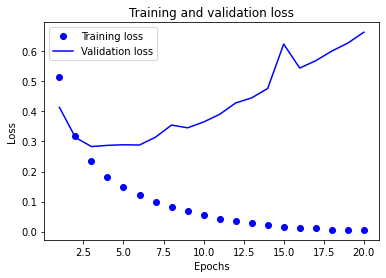

In [11]:
# Plot the training and validation LOSS
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # 'bo' blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # 'b' blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

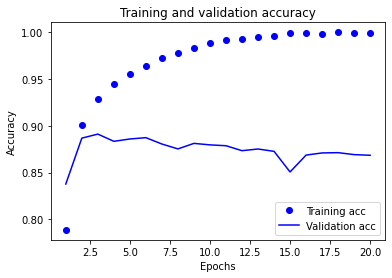

In [12]:
# Plot the training and validation ACCURACY
plt.clf()  # clear the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Model Fitting

In [13]:
# Fit model
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2095 - accuracy: 0.9469
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1263 - accuracy: 0.9607
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0965 - accuracy: 0.9710
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0724 - accuracy: 0.9788


In [14]:
# Evaluate model
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4827 - accuracy: 0.8634


In [16]:
# Show results
print(f'Test loss: {results[0]:0.3f}\nTest accuracy: {results[1]:0.3f}')

Test loss: 0.483
Test accuracy: 0.863


#### Generate predictions

In [17]:
# Predict test data
model.predict(x_test)

array([[0.01110578],
       [0.9999922 ],
       [0.99657464],
       ...,
       [0.1278049 ],
       [0.10602394],
       [0.8755686 ]], dtype=float32)

### Assignment 5.2
Implement the news classifier found in section 3.5 of Deep Learning with Python.

#### Load the data

In [19]:
# Load the Reuters dataset
from tensorflow.keras.datasets import reuters
# split train / test data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [21]:
print("The length of traning dataset: {}".format(len(train_data)))
print("The length of test dataset: {}".format(len(test_data)))

The length of traning dataset: 8982
The length of test dataset: 2246


#### Data Preparation

In [22]:
# Encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [23]:
# Vectorize the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
# Set up one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [26]:
# One-hot encode the labels
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
## Alternatively Keras lib can be used as mentioned below
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

#### Model Building

In [28]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # measures distance between 2 probabilty distributions
              metrics=["accuracy"])

#### Model Validation

In [30]:
## Set aside a validation set (10,000 samples)
# Data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
# Labels
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 2.6118 - accuracy: 0.5258 - val_loss: 1.7382 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3950 - accuracy: 0.7055 - val_loss: 1.2913 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0383 - accuracy: 0.7750 - val_loss: 1.1314 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8144 - accuracy: 0.8301 - val_loss: 1.0684 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6505 - accuracy: 0.8662 - val_loss: 0.9593 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5184 - accuracy: 0.8916 - val_loss: 0.9221 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4233 - accuracy: 0.9126 - val_loss: 0.9114 - val_accuracy: 0.8090
Epoch 8/20
16

#### Plotting the result

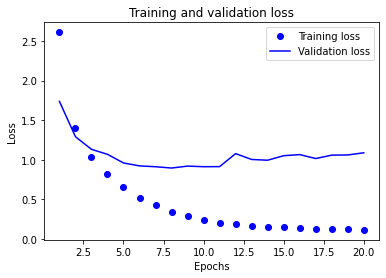

In [32]:
# Plot the training and validation LOSS
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

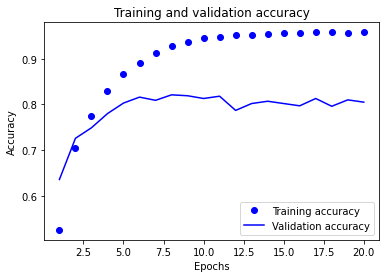

In [33]:
# Plot the training and validation ACCURACY
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Model Fitting

In [34]:
# Fit model
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9
18/18 [==============================] - 0s 12ms/step - loss: 0.2138 - accuracy: 0.9414
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1648 - accuracy: 0.9471
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.1438 - accuracy: 0.9500
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1332 - accuracy: 0.9539
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1240 - accuracy: 0.9532
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.1201 - accuracy: 0.9540
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.1171 - accuracy: 0.9545
Epoch 8/9
18/18 [==============================] - 0s 11ms/step - loss: 0.1112 - accuracy: 0.9545
Epoch 9/9
18/18 [==============================] - 0s 13ms/step - loss: 0.1116 - accuracy: 0.9560


In [35]:
# Evaluate model
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.3359 - accuracy: 0.7876


In [37]:
# Show results
print(f'Test loss: {results[0]:0.3f}\nTest accuracy: {results[1]:0.3f}')

Test loss: 1.336
Test accuracy: 0.788


In [38]:
# Predict test data
predictions = model.predict(x_test)

In [39]:
predictions[0]

array([4.96593930e-06, 8.68394636e-07, 1.36702042e-07, 8.62344682e-01,
       7.67317712e-02, 1.47404214e-10, 3.00806868e-09, 6.34642565e-05,
       6.04539830e-03, 1.01301430e-06, 4.23747331e-08, 2.77778786e-02,
       3.22184064e-06, 5.35935169e-06, 3.60176813e-08, 2.30063506e-07,
       6.53075171e-04, 4.67550336e-08, 1.18455284e-06, 2.89977156e-03,
       2.32233517e-02, 1.07884094e-04, 2.67851181e-08, 6.77256153e-08,
       4.97829822e-09, 4.14858590e-07, 2.04205611e-10, 1.11060615e-07,
       4.64958021e-06, 3.71215856e-06, 1.65704259e-05, 1.66338974e-11,
       9.97571419e-07, 9.28010724e-10, 5.14841759e-06, 1.58880198e-07,
       7.74415894e-05, 4.70382240e-08, 4.13131920e-06, 2.11911884e-05,
       3.13704675e-07, 5.16779664e-07, 7.80447973e-09, 1.84905355e-10,
       2.11908702e-12, 1.00457470e-07], dtype=float32)

### Assignment 5.3
Implement the housing price regression model found in section 3.6 of Deep Learning with Python

#### Load Data

In [40]:
# Load the Boston Housing dataset
from keras.datasets import boston_housing
# split train / test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [41]:
print("The length of traning dataset: {}".format(len(train_data)))
print("The length of test dataset: {}".format(len(test_data)))

The length of traning dataset: 404
The length of test dataset: 102


#### Data Preparation

In [42]:
## Perform feature-wise normalization
# Normalize train data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std
# Normalize test data
test_data -= mean
test_data /= std

#### Model Building

In [43]:
def build_model():
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # Compile the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Validate the model

In [44]:
# Set up K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #: {i}")
    # prepare the validation data (from partition #k)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # prepare training data (from non-k partitions)
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build the already compiled keras model
    model = build_model()
    
    # train the model, saving validation logs at each fold
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) # verbose=0: silent mode
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #: 0
Processing fold #: 1
Processing fold #: 2
Processing fold #: 3


In [45]:
# Compute the average of per-epoch MAE scores for all folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

#### Plot the results

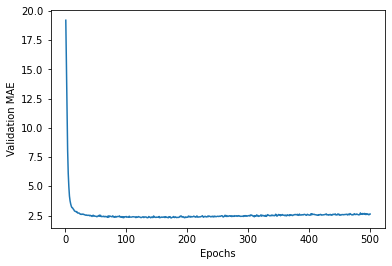

In [46]:
# Plot the validation MAE by epoch
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

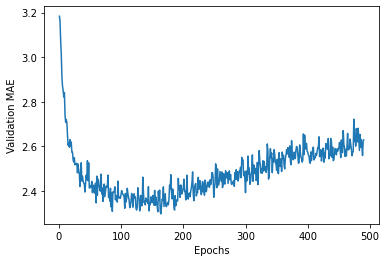

In [47]:
# Plot again, omitting the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Model Training

In [48]:
model = build_model() # get a fresh compiled model
# Train on the entirety of the training data
model.fit(train_data, train_targets,
         epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 967us/step - loss: 17.0576 - mae: 2.6823


In [49]:
# Evaluate model
test_mae_score

2.6822896003723145

#### Generate Predictions

In [50]:
# Predict test data
predictions = model.predict(test_data)
predictions[0]

array([9.47395], dtype=float32)